<a href="https://colab.research.google.com/github/nubialmeida/Projeto-Pandas/blob/main/Projeto_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação de bibliotecas

In [ ]:
!pip install gcsfs
!pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 KB 3.7 MB/s eta 0:00:00


In [ ]:
pip install pymongo 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Declaração das LIBS

In [ ]:
import pandas as pd #importando bibliotecas
import numpy as np
import os
from google.cloud import storage
import pandera as pa
import pymongo
from pymongo import MongoClient

#Conector MongoDB Atlas


In [ ]:
uri = "mongodb+srv://cluster0.pvxzqua.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,tls=True,
                     tlsCertificateKeyFile='/content/drive/MyDrive/MongoDb/X509-cert-342951600753315466.pem')

##Conector para Cloud Storage(bucket)

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto) conector

serviceAccount = '/content/drive/MyDrive/chave/colab.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
from google.colab import drive #montando drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('nubialmeida45')
bucket.blob('marketing_campaign.csv - marketing_campaign.csv (1).csv')
path = 'gs://nubialmeida45/brutos/marketing_campaign.csv - marketing_campaign.csv (1).csv'

##Extração dos dados(Extract)

In [ ]:
df = pd.read_csv(path,sep=',',encoding='ISO-8859-1')

##Config . do pandas

In [ ]:
#Fazendo com que o DF mostre as colonas que ele tem
pd.set_option('display.max_columns',29)

##Pré analise

In [ ]:
 #verificando tipos do DF
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
df.head(3) #verificando os 3 primeiros

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0


##Tranformações (Limpeza, conversão , etc)

In [ ]:
#Adicionando as colunas de participação da campanha em ordem numérica
df['Participacao_campanha1'] = df.AcceptedCmp1
df['Participacao_campanha2'] = df.AcceptedCmp2
df['Participacao_campanha3'] = df.AcceptedCmp3
df['Participacao_campanha4'] = df.AcceptedCmp4
df['Participacao_campanha5'] = df.AcceptedCmp5

In [ ]:
#Drop colunas repetidas
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1,inplace=True)

In [ ]:
df.head(3)  # verifcando os 3 primeiros 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Participacao_campanha1,Participacao_campanha2,Participacao_campanha3,Participacao_campanha4,Participacao_campanha5
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0,0,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0,0,0,0,0


In [ ]:
#Renomeando colunas

df.rename(columns={
                   'Year_Birth': 'Ano_nascimento',
                   'Education': 'Educacao',
                   'Marital_Status': 'Status_relacionamento',
                   'Income':'Renda_familiar_anual_cliente',
                   'Kidhome' : 'Dependente_crianca',
                   'Teenhome' : 'Dependente_adolescente',
                   'Dt_Customer':'Data_inscricao_cliente',
                   'Recency': 'dias_ultima_compra',
                   'MntWines' : 'Gasto_vinhos',
                   'MntFruits': 'Gasto_frutas',
                   'MntMeatProducts' : 'Gasto_origem_animal',
                   'MntFishProducts': 'Gasto_peixes',
                   'MntSweetProducts' : 'Gasto_doces',
                   'MntGoldProds': 'Gasto_com_ouro',
                   'NumDealsPurchases': 'Compras_com_desconto',
                   'NumWebPurchases' : 'Ncompras_site',
                   'NumCatalogPurchases' : 'Ncompras_catalogo',
                   'NumStorePurchases' : 'Ncompras_lojas',
                   'NumWebVisitsMonth': 'Visitas_ao_site_por_mes',
                   'Complain': 'Reclamacao',
                   'Z_CostContact': 'Custo_contato_cliente',
                   'Z_Revenue': 'Receita_aceita_pos_campanha',
                   'Response':'Cliente_aceitou_ultima_campanha',
                   }, 
                   inplace = True)

In [ ]:
sorted(pd.unique(df['Status_relacionamento']))#vericando os itens únicos dentro da coluna

['Absurd',
 'Alone',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow',
 'YOLO']

In [ ]:
sorted(pd.unique(df['Educacao'])) #vericando os itens únicos dentro da coluna

['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

In [ ]:
#traduzindo linhas
df.replace(['Graduation','PhD','Master', 'Basic', '2n Cycle'],['Graduacao','PHD', 'Mestrado', 'Ensino Fundamental e Medio','Pos_graduacao'],inplace=True)
df.replace(['Single', 'Together','Married','Divorced', 'Widow'], ['Solteiro', 'Uniao_estavel', 'Casado(a)','Divorciado(a)','Viúvo(a)'],inplace=True)

In [ ]:
df 

,ID,Ano_nascimento,Educacao,Status_relacionamento,Renda_familiar_anual_cliente,Dependente_crianca,Dependente_adolescente,Data_inscricao_cliente,dias_ultima_compra,Gasto_vinhos,Gasto_frutas,Gasto_origem_animal,Gasto_peixes,Gasto_doces,Gasto_com_ouro,Compras_com_desconto,Ncompras_site,Ncompras_catalogo,Ncompras_lojas,Visitas_ao_site_por_mes,Reclamacao,Custo_contato_cliente,Receita_aceita_pos_campanha,Cliente_aceitou_ultima_campanha,Participacao_campanha1,Participacao_campanha2,Participacao_campanha3,Participacao_campanha4,Participacao_campanha5
0,5524,1957,Graduacao,Solteiro,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0,0,0,0,0
1,2174,1954,Graduacao,Solteiro,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0,0,0,0,0
2,4141,1965,Graduacao,Uniao_estavel,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0,0,0,0,0
3,6182,1984,Graduacao,Uniao_estavel,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0,0,0,0,0
4,5324,1981,PHD,Casado(a),58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduacao,Casado(a),61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,3,11,0,0,0,0,0,0
2236,4001,1946,PHD,Uniao_estavel,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,3,11,0,1,0,0,0,0
2237,7270,1981,Graduacao,Divorciado(a),56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,3,11,0,0,0,0,1,0
2238,8235,1956,Mestrado,Uniao_estavel,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,3,11,0,0,0,0,0,0


In [ ]:
pd.unique(df['ID'])

array([5524, 2174, 4141, ..., 7270, 8235, 9405])

In [ ]:
#Trocando NA por NaN
df.replace(pd.NA,np.NaN,inplace=True)

In [ ]:
#Verifica se tem nulos ou ausentes
df.isna().sum()

ID                                  0
Ano_nascimento                      0
Educacao                            0
Status_relacionamento               0
Renda_familiar_anual_cliente       24
Dependente_crianca                  0
Dependente_adolescente              0
Data_inscricao_cliente              0
dias_ultima_compra                  0
Gasto_vinhos                        0
Gasto_frutas                        0
Gasto_origem_animal                 0
Gasto_peixes                        0
Gasto_doces                         0
Gasto_com_ouro                      0
Compras_com_desconto                0
Ncompras_site                       0
Ncompras_catalogo                   0
Ncompras_lojas                      0
Visitas_ao_site_por_mes             0
Reclamacao                          0
Custo_contato_cliente               0
Receita_aceita_pos_campanha         0
Cliente_aceitou_ultima_campanha     0
Participacao_campanha1              0
Participacao_campanha2              0
Participacao

##GroupBY ( Agrupamentos)

In [ ]:
df.groupby(['Cliente_aceitou_ultima_campanha']).size().sort_values(ascending=False)

Cliente_aceitou_ultima_campanha
0    1906
1     334
dtype: int64

In [ ]:
df.groupby(['Participacao_campanha1']).size().sort_values(ascending=False)

Participacao_campanha1
0    2096
1     144
dtype: int64

In [ ]:
df.groupby(['Participacao_campanha2']).size().sort_values(ascending=False)

Participacao_campanha2
0    2210
1      30
dtype: int64

In [ ]:
df.groupby(['Participacao_campanha3']).size().sort_values(ascending=False) #aumento de pessoas que aceitaram

Participacao_campanha3
0    2077
1     163
dtype: int64

In [ ]:
df.groupby(['Participacao_campanha4']).size().sort_values(ascending=False) #continua subindo e descendo

Participacao_campanha4
0    2073
1     167
dtype: int64

In [ ]:
df.groupby(['Participacao_campanha5']).size().sort_values(ascending=False)

Participacao_campanha5
0    2077
1     163
dtype: int64

In [ ]:
df.groupby(['Reclamacao']).size().sort_values(ascending=False)

Reclamacao
0    2219
1      21
dtype: int64

In [ ]:
df.groupby(['Visitas_ao_site_por_mes']).size().sort_values(ascending=False)

Visitas_ao_site_por_mes
7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
10      3
20      3
14      2
19      2
13      1
17      1
dtype: int64

In [ ]:
df.groupby(['Status_relacionamento']).size().sort_values(ascending=False)

Status_relacionamento
Casado(a)        864
Uniao_estavel    580
Solteiro         480
Divorciado(a)    232
Viúvo(a)          77
Alone              3
Absurd             2
YOLO               2
dtype: int64

##Plotagem

<AxesSubplot:xlabel='ANO', ylabel='Valores gastos'>

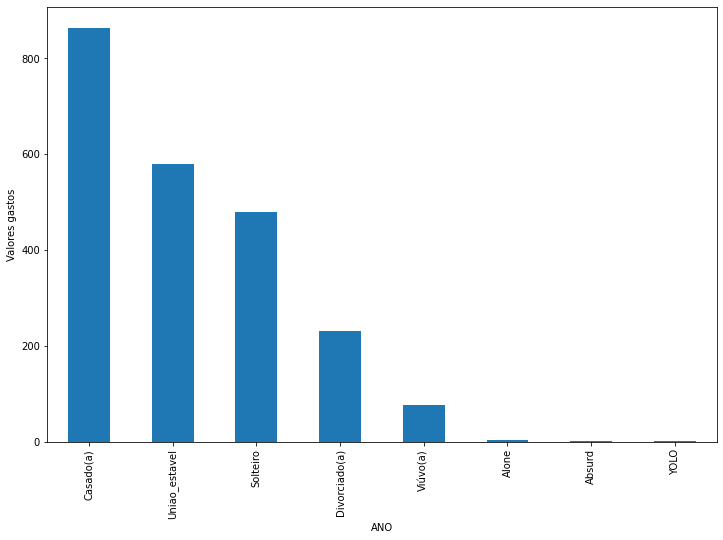

In [ ]:
df.groupby('Status_relacionamento')['Gasto_vinhos'].count().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ANO',ylabel='Valores gastos')

In [ ]:
df.groupby('Status_relacionamento')['Gasto_doces'].count().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ANO',ylabel='Valores gastos')

NameError: ignored

<AxesSubplot:xlabel='ANO', ylabel='Valores gastos'>

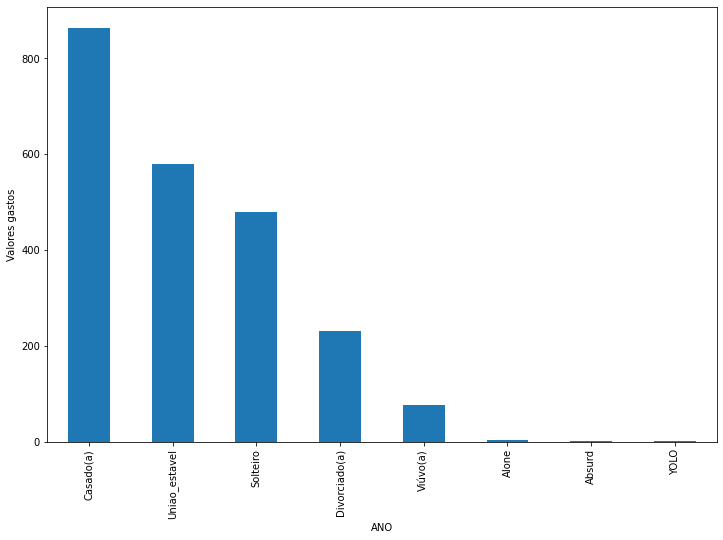

In [ ]:
df.groupby('Status_relacionamento')['Gasto_com_ouro'].count().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ANO',ylabel='Valores gastos')

In [ ]:
df.groupby('Status_relacionamento')['Gasto_doce'].count().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ANO',ylabel='Valores gastos')

NameError: ignored

<AxesSubplot:xlabel='Gastos_com_cliente', ylabel='Clientes'>

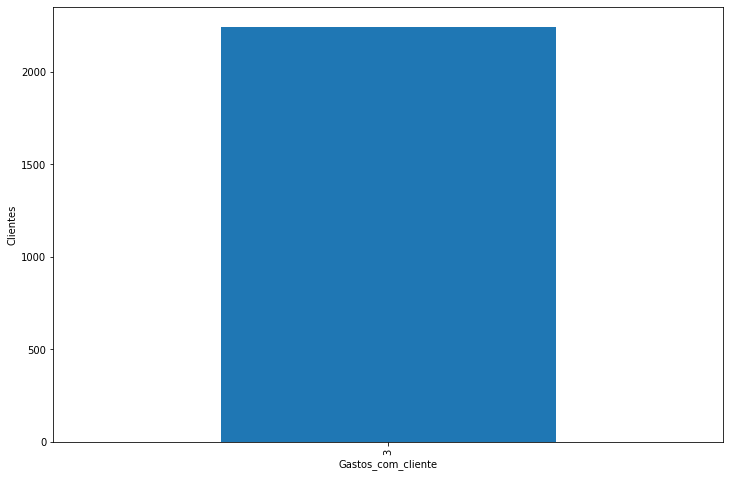

In [ ]:
df.groupby(['Custo_contato_cliente'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Gastos_com_cliente',ylabel='Clientes')

<AxesSubplot:xlabel='Qnt_compras', ylabel='Clientes'>

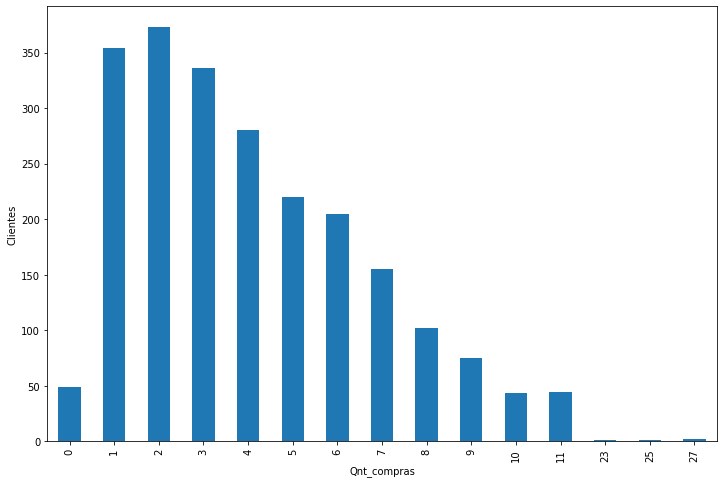

In [ ]:
df.groupby(['Ncompras_site'],dropna=False).size().plot.bar(figsize=(12,8),xlabel='Qnt_compras',ylabel='Clientes')

<AxesSubplot:xlabel='Qnt_compras', ylabel='Clientes'>

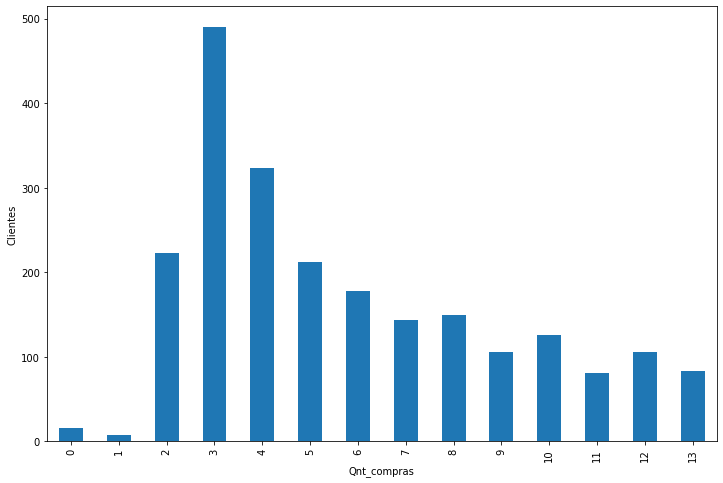

In [ ]:
df.groupby(['Ncompras_lojas'],dropna=False).size().plot.bar(figsize=(12,8),xlabel='Qnt_compras',ylabel='Clientes') # verificando a quantidade de compras no mes

In [ ]:
df.groupby('Reclamacao')[['Ncompras_site', 'Ncompras_lojas']].sum()# verificando a quantidade de  reclamacão no mês

,Ncompras_site,Ncompras_lojas
Reclamacao,,
0,9074,12860
1,76,110


<AxesSubplot:xlabel='faixa_renda', ylabel='compas_site'>

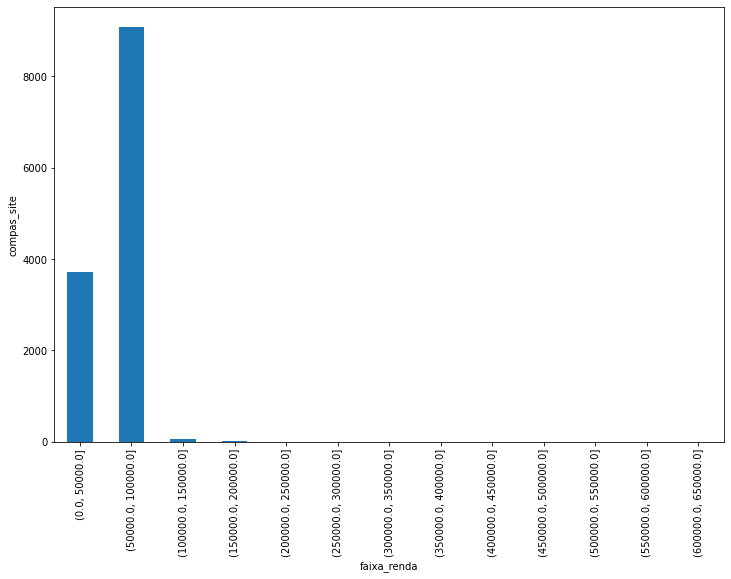

In [ ]:
faixas_de_renda = np.arange(0, df['Renda_familiar_anual_cliente'].max(), 50000)
grupo_faixa_renda = pd.cut(df['Renda_familiar_anual_cliente'], faixas_de_renda)
df.groupby(grupo_faixa_renda)['Ncompras_lojas'].sum().plot.bar(figsize=(12,8), xlabel='faixa_renda', ylabel='compras_site')# verificando a renda das pessoas por gastos na loja

In [ ]:
def to_age(born): #funcao que calcula a idade 
  current_year = pd.to_datetime('today').year
  return current_year - born

<AxesSubplot:xlabel='faixa_idade', ylabel='compras_site'>

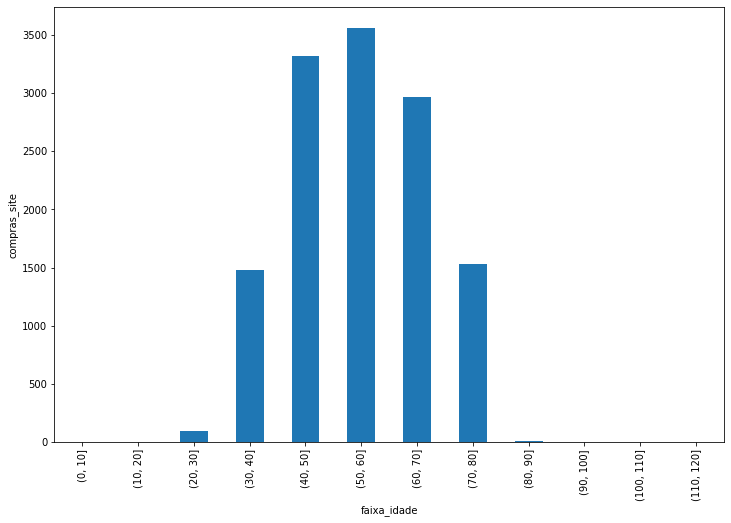

In [ ]:
idade = df['Ano_nascimento'].apply(to_age)
faixas_de_idade = np.arange(0, idade.max(), 10)
grupo_faixa_idade = pd.cut(idade, faixas_de_idade)
df.groupby(grupo_faixa_idade)['Ncompras_lojas'].sum().plot.bar(figsize=(12,8), xlabel='faixa_idade', ylabel='compras_site') #faixa etária por produto

##Criação do Schema de validação de dados

In [ ]:

schema = pa.DataFrameSchema(
    columns = {	
        'ID':pa.Column(pa.Int),
        'Ano_nascimento':pa.Column(pa.Int),
        'Educacao':pa.Column(pa.String),
        'Status_relacionamento':pa.Column(pa.Int),
        'Renda_familiar_anual_cliente':pa.Column(pa.Int),
        'Depedente_crianca':pa.Column(pa.Int),
        'Depedente_adolescente':pa.Column(pa.Int),
        'Inscrição_cliente_na_empresa':pa.Column(pa.Int),
        'Dias_última_compra':pa.Column(pa.Int),
        'Gasto_Vinhos':pa.Column(pa.Int),
        'Gasto_Frutas':pa.Column(pa.Int),
        'Gasto_origem_animal':pa.Column(pa.Int),
        'Gasto_peixes':pa.Column(pa.Int),
        'Gasto_doces':pa.Column(pa.Int),
        'Gasto_com_ouro':pa.Column(pa.Int),
        'Compras_com_desconto':pa.Column(pa.Int),
        'Ncompras_site':pa.Column(pa.Int),
        'Ncompras_catalogo':pa.Column(pa.Int),
        'Ncompras_lojas':pa.Column(pa.Int),
        'Visitas_ao_site_por_mes':pa.Column(pa.Int),
        'Entrou_campanha_3':pa.Column(pa.Int),
        'Entrou_campanha_4':pa.Column(pa.Int),
        'Entrou_campanha_5':pa.Column(pa.Int),
        'Entrou_campanha_1':pa.Column(pa.Int),
        'Entrou_campanha_2':pa.Column(pa.Int),
        'Reclamacao':pa.Column(pa.Int),
        'Custo_contato_cliente':pa.Column(pa.Int),
        'Receita_aceita_pos_campanha':pa.Column(pa.Int),
        'Cliente_aceitou_ultima_campanha':pa.Column(pa.Int),
    }
)

##LOAD (Carregamento) salvar o df.

In [ ]:
#para o bucket
df.to_csv('gs://nubialmeida45/tratados/marketing_campaign_tratados.csv', index=False)

In [ ]:
#Conector MongoDB Atlas

db = client['campanha_marketing']
colecao = db['colecao_campanha_marketing_tratados']



In [ ]:
#seleção de base e coleção
db = client['brutos']
colecaomarketing = db['tratado']
colecaomarketing.count_documents({})

2240

In [ ]:

#Envio de um dataframe para coleção no MONGO
df_dict = df.to_dict("records")

colecaomarketing.insert_many(df_dict)


In [ ]:
#Utilizar se for o rotulo padrão 
df.to_csv('marketing_campaign.csv - marketing_campaign.csv (1).csv_ok.csv',index=False)

##Considerações finais

Sem ter um contexto completo, pode-se dizer que essa base de dados parece ter sido extraída de um sistema anterior a realização das campanhas. Embora a inserção e controle desse sistema fossem mais básica, de forma geral, esse sistema fazia gestão de informações de clientes, incluindo histórico de produtos consumidos.

Através desses dados, pode-se ter uma ideia do perfil de consumo de cada cliente. Pode-se inferir algumas relações cruzando os dados como a relação de produtos consumidos x presença de crianças dentro de casa e tipos de produtos comprados x estado civil do cliente.

Um sugestão de ação para tomar com os dados seria encaminhar promoções específicas para certos grupos de clientes. A plotagem que mostra o consumo de doce sugere que seria interessante fazer uma campanha de publicidade voltado a pessoas sem filhos.

Com a adição de dados mais pontuais, como data da participação do cliente na campanha, produto comprado na última visita e talvez um fator de controle, como um cupom promocional para os que participaram da pesquisa, seria possível verificar se a pesquisa está gerando um crescimento maior de clientes e se a pesquisa está sugerindo produtos específicos para os nichos específicos.

Outra sugestão seria separar em outra coleção a receita e gastos das campanhas já que essa coleção parece ser mais voltada às informações dos cliente.